In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

In [2]:
def parse_losses(fn):
    gen_losses = []
    dis_losses = []
    with open(fn, "r") as f:
        i = 1
        for l in f:
            if i % 2 == 1: 
                gen_losses.append([float(i)  for i in l[:-2].split("[")[1].split(" ") if i != ""])
            else:
                dis_losses.append([float(i)  for i in l[:-2].split("[")[1].split(" ") if i != ""])
            i += 1
            
    return gen_losses, dis_losses

In [3]:
def plot_losses(gen_losses, dis_losses, title):
    gen_losses = np.array(gen_losses)
    dis_losses = np.array(dis_losses)
    assert gen_losses.shape == dis_losses.shape
    for i in range(gen_losses.shape[1]):
        plt.title(title + " layer {}".format(i+1))
        plt.scatter(np.arange(gen_losses.shape[0]), gen_losses[:,i], s=11, alpha=0.6, label="generator")
        plt.scatter(np.arange(gen_losses.shape[0]), dis_losses[:,i], s=11, alpha=0.6, label="discriminator")
        plt.legend()
        plt.ylabel("Losses")
        plt.xlabel("Epochs")
        plt.show()

In [4]:
plt.style.use('dark_background')

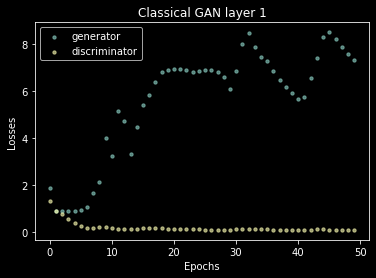

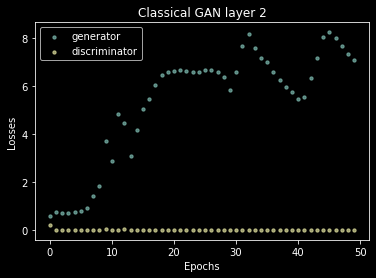

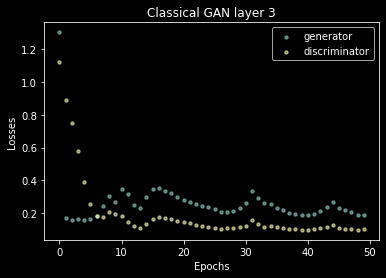

In [5]:
cla_gen_losses, cla_diss_losses = parse_losses("../results/loss_gan")

plot_losses(cla_gen_losses, cla_diss_losses, "Classical GAN")

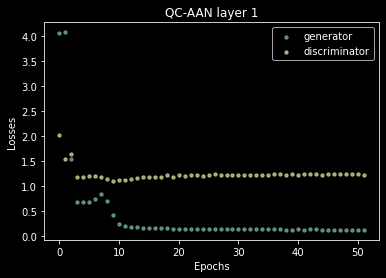

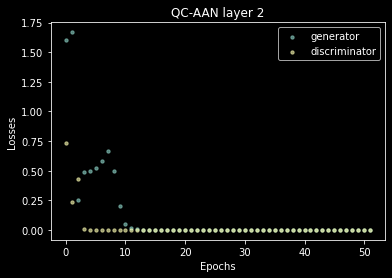

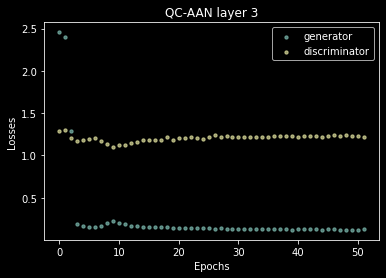

In [6]:
qc_gen_losses, qc_diss_losses = parse_losses("../results/loss_qcaan")

plot_losses(qc_gen_losses, qc_diss_losses, "QC-AAN")

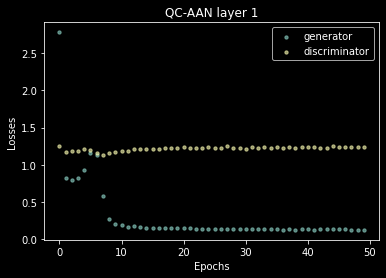

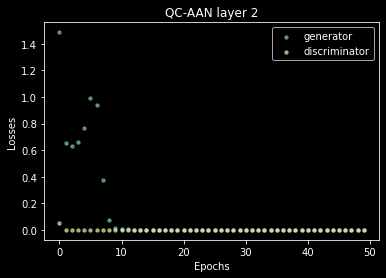

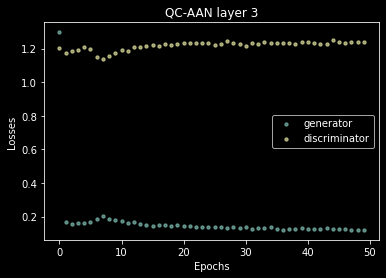

In [7]:
qc_gen_losses, qc_diss_losses = parse_losses("../results/loss_qcaan1")

plot_losses(qc_gen_losses, qc_diss_losses, "QC-AAN")

In [28]:
from collections import defaultdict
qcbm_costs = defaultdict(list)
with open("../results/hyperparameters_qcbm.txt", "r") as f:
    lines = f.readlines()
    lines_ixs = []
    for i in range(len(lines)):
        l = lines[i]
        if l.startswith("#"):
            lines_ixs.append(i)
    for j in range(len(lines_ixs)-1):
        costs = []
        costs_str = lines[lines_ixs[j]:lines_ixs[j+1]]
        for c in costs_str[4:]:
            cost = c.split(":")[1].strip()
            costs.append(float(cost))
        qcbm_costs[costs_str[1].strip()] = costs
print(qcbm_costs)

defaultdict(<class 'list'>, {'3 layers, 1000 shots, ansatz: StronglyEntangled, pswarm with 8 particles. Every 20th iteration is printed.': [1.5696234395462711, 1.4887818519921636, 1.2887660185175571, 1.3064094874892047, 1.386676720958568, 1.190676943233444, 1.2105181902461382, 1.2223925567709593, 1.2412204076896156, 0.942014270597708], '3 layers, 1000 shots, ansatz: StronglyEntangled, pswarm with 12 particles. Every 20th iteration is printed.': [1.7068565462971332, 1.6765054798461942, 1.6942872772839628, 1.7215636989136838, 1.6018278579694014, 1.5013922522454421, 1.5418776518338024, 1.4928509206183547, 1.4871131684073935, 1.324298383792094], '3 layers, 1000 shots, ansatz: StronglyEntangled, pswarm with 16 particles. Every 20th iteration is printed.': [1.7182129378610898, 1.6847378922060612, 1.573325106950615, 1.6299685024328125, 1.708866033323547, 1.640117446697243, 1.621808151198508, 1.6032513726353503, 1.467364061971446, 1.5158825619462317], '3 layers, 1000 shots, ansatz: StronglyEnt

3 layers, 1000 shots, ansatz: StronglyEntangled, pswarm with 8 particles. Every 20th iteration is printed.
[1.5696234395462711, 1.4887818519921636, 1.2887660185175571, 1.3064094874892047, 1.386676720958568, 1.190676943233444, 1.2105181902461382, 1.2223925567709593, 1.2412204076896156, 0.942014270597708]
3 layers, 1000 shots, ansatz: StronglyEntangled, pswarm with 12 particles. Every 20th iteration is printed.
[1.7068565462971332, 1.6765054798461942, 1.6942872772839628, 1.7215636989136838, 1.6018278579694014, 1.5013922522454421, 1.5418776518338024, 1.4928509206183547, 1.4871131684073935, 1.324298383792094]
3 layers, 1000 shots, ansatz: StronglyEntangled, pswarm with 16 particles. Every 20th iteration is printed.
[1.7182129378610898, 1.6847378922060612, 1.573325106950615, 1.6299685024328125, 1.708866033323547, 1.640117446697243, 1.621808151198508, 1.6032513726353503, 1.467364061971446, 1.5158825619462317]
3 layers, 1000 shots, ansatz: StronglyEntangled, pswarm with 24 particles. Every 20

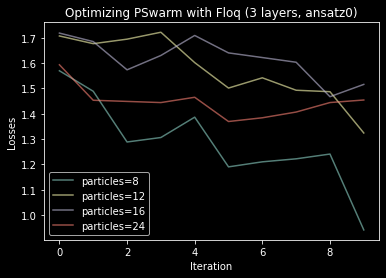

In [38]:
plt.title("Optimizing PSwarm with Floq (3 layers, ansatz0)".format(i))
for i in (8,12,16,24):
    k = "3 layers, 1000 shots, ansatz: StronglyEntangled, pswarm with {} particles. Every 20th iteration is printed.".format(i)
    print(k)
    print(qcbm_costs[k])
    plt.plot(np.arange(len(qcbm_costs[k])),qcbm_costs[k], alpha=0.6, label="particles={}".format(i))
    plt.legend()
    plt.ylabel("Losses")
    plt.xlabel("Iteration")
plt.show() 

3 layers, 1000 shots, ansatz: from the paper, pswarm with 8 particles. Every 20th iteration is printed.
[1.1897583741239817, 1.1221271288109016, 1.0290329081468206, 1.0618112668303419, 0.9800279739660038, 0.9467059809008473, 0.9577438373262004, 0.9941065522314331, 1.004781142778332, 0.9645474936862245]
3 layers, 1000 shots, ansatz: from the paper, pswarm with 12 particles. Every 20th iteration is printed.
[1.5103021051411756, 1.5185030757902234, 1.5021208229970129, 0.8655688227211782, 0.6705705567035787, 0.6193428667012627, 0.6240580866994389, 0.6074420975233307, 0.5991827879089255, 0.616992890037538]
3 layers, 1000 shots, ansatz: from the paper, pswarm with 16 particles. Every 20th iteration is printed.
[1.5859082622499063, 1.6417093446602349, 1.7088985855504073, 1.6825919387453323, 1.6333972630901472, 1.6379244260258843, 1.6099738787901432, 1.6418917370906423, 1.6379219096327498, 1.5969252610679145]
3 layers, 1000 shots, ansatz: from the paper, pswarm with 24 particles. Every 20th it

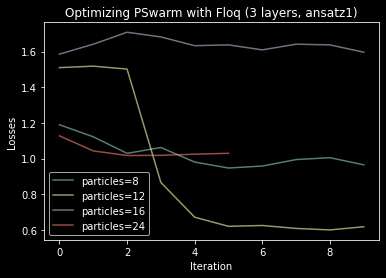

In [40]:
plt.title("Optimizing PSwarm with Floq (3 layers, ansatz1)".format(i))
for i in (8,12,16,24):
    k = "3 layers, 1000 shots, ansatz: from the paper, pswarm with {} particles. Every 20th iteration is printed.".format(i)
    print(k)
    print(qcbm_costs[k])
    plt.plot(np.arange(len(qcbm_costs[k])),qcbm_costs[k], alpha=0.6, label="particles={}".format(i))
    plt.legend()
    plt.ylabel("Losses")
    plt.xlabel("Iteration")
plt.show() 

3 layers, 1000 shots, ansatz: StronglyEntangled, pswarm with 12 particles. Every 20th iteration is printed.
[1.7068565462971332, 1.6765054798461942, 1.6942872772839628, 1.7215636989136838, 1.6018278579694014, 1.5013922522454421, 1.5418776518338024, 1.4928509206183547, 1.4871131684073935, 1.324298383792094]
5 layers, 1000 shots, ansatz: StronglyEntangled, pswarm with 12 particles. Every 20th iteration is printed.
[1.6509174447597168, 1.6281035865808833, 1.4187050172030244, 1.324976460941447, 1.4186417904900912, 1.4376645937565444, 1.3784912693790594]


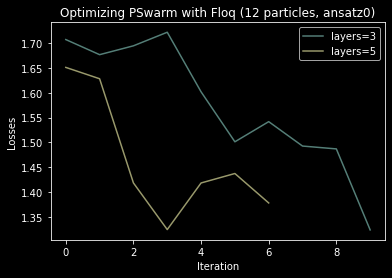

In [48]:
plt.title("Optimizing PSwarm with Floq (12 particles, ansatz0)".format(i))
for i in (3,5):
    k = "{} layers, 1000 shots, ansatz: StronglyEntangled, pswarm with 12 particles. Every 20th iteration is printed.".format(i)
    print(k)
    print(qcbm_costs[k])
    plt.plot(np.arange(len(qcbm_costs[k])),qcbm_costs[k], alpha=0.6, label="layers={}".format(i))
    plt.legend()
    plt.ylabel("Losses")
    plt.xlabel("Iteration")
plt.show() 

3 layers, 1000 shots, ansatz: from the paper, pswarm with 12 particles. Every 20th iteration is printed.
[1.5103021051411756, 1.5185030757902234, 1.5021208229970129, 0.8655688227211782, 0.6705705567035787, 0.6193428667012627, 0.6240580866994389, 0.6074420975233307, 0.5991827879089255, 0.616992890037538]
5 layers, 1000 shots, ansatz: from the paper, pswarm with 12 particles. Every 20th iteration is printed.
[1.934674589041371, 1.614518115594245, 1.527217716710095, 1.540036898468757, 1.5289631356078135, 1.4873870859899851, 1.4625145236171557]


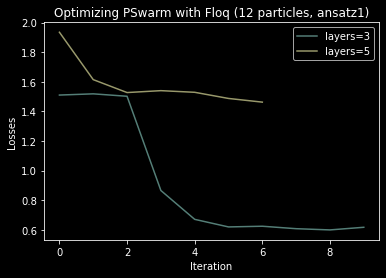

In [49]:
plt.title("Optimizing PSwarm with Floq (12 particles, ansatz1)".format(i))
for i in (3,5):
    k = "{} layers, 1000 shots, ansatz: from the paper, pswarm with 12 particles. Every 20th iteration is printed.".format(i)
    print(k)
    print(qcbm_costs[k])
    plt.plot(np.arange(len(qcbm_costs[k])),qcbm_costs[k], alpha=0.6, label="layers={}".format(i))
    plt.legend()
    plt.ylabel("Losses")
    plt.xlabel("Iteration")
plt.show() 

3 layers, 1000 shots, ansatz: StronglyEntangled, grad_descent with train_rate=0.001. Every 100th iteration is printed.
[2.095815389568091, 2.4057047850248776, 2.002961515313955, 2.30593770764517, 2.254247965942425, 2.1643461975161653, 2.4862173199522006, 2.1997745470646723, 2.3120373503390965, 2.3337143168156818, 2.557802191546664, 2.4399009575545394, 2.4570410942358896]
3 layers, 1000 shots, ansatz: StronglyEntangled, grad_descent with train_rate=0.01. Every 100th iteration is printed.
[2.493737073536221, 2.230912407725982, 2.611899562293151, 2.37531518609236, 2.50354149923345, 2.8068381679858385, 2.514211827897421, 2.3375499152627257, 2.441090628450148, 2.462373618833449, 2.271436907036819, 2.236269070321529, 2.0784880067311167]
3 layers, 1000 shots, ansatz: StronglyEntangled, grad_descent with train_rate=0.05. Every 100th iteration is printed.
[2.511004808206289, 2.109878260936505, 2.4843681784559553, 2.0709265840227093, 2.481590730970038, 2.919287692741025, 2.412178429700366, 2.533

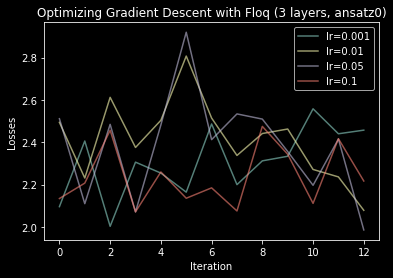

In [53]:
plt.title("Optimizing Gradient Descent with Floq (3 layers, ansatz0)".format(i))
for i in (0.001,0.01,0.05,0.1):
    k = "3 layers, 1000 shots, ansatz: StronglyEntangled, grad_descent with train_rate={}. Every 100th iteration is printed.".format(i)
    print(k)
    print(qcbm_costs[k])
    plt.plot(np.arange(len(qcbm_costs[k])),qcbm_costs[k],  alpha=0.6, label="lr={}".format(i))
    plt.legend()
    plt.ylabel("Losses")
    plt.xlabel("Iteration")
plt.show() 

5 layers, 1000 shots, ansatz: from the paper, grad_descent with train_rate=0.001. Every 100th iteration is printed.
[1.7590170427265586, 1.978158167666818, 2.1814823224829674, 2.0590854045854847, 2.69802165165733, 2.366314825773183, 2.754576154875451, 2.6901055365023154, 2.842083886774524]
5 layers, 1000 shots, ansatz: from the paper, grad_descent with train_rate=0.01. Every 100th iteration is printed.
[2.193417851950908, 2.296585051457035, 2.4389483542159796, 2.255088756469041, 2.435211812331545, 2.3642775298942547, 2.115420823984015, 2.1351348276190336, 1.9382210441615526]
5 layers, 1000 shots, ansatz: from the paper, grad_descent with train_rate=0.05. Every 100th iteration is printed.
[2.976128078365071, 2.772105204286344, 2.2133196989083754, 2.3603835686652634, 2.014684899378431, 2.110125052064669, 2.2933901826687393, 2.4051396018170528, 3.1545853896830645]
5 layers, 1000 shots, ansatz: from the paper, grad_descent with train_rate=0.1. Every 100th iteration is printed.
[2.409179704

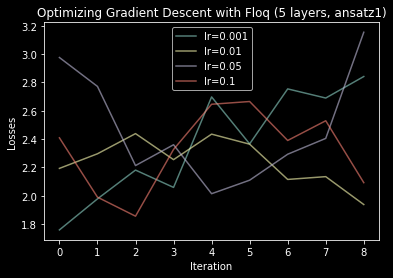

In [57]:
plt.title("Optimizing Gradient Descent with Floq (5 layers, ansatz1)".format(i))
for i in (0.001,0.01,0.05,0.1):
    k = "5 layers, 1000 shots, ansatz: from the paper, grad_descent with train_rate={}. Every 100th iteration is printed.".format(i)
    print(k)
    print(qcbm_costs[k])
    plt.plot(np.arange(len(qcbm_costs[k])),qcbm_costs[k],  alpha=0.6, label="lr={}".format(i))
    plt.legend()
    plt.ylabel("Losses")
    plt.xlabel("Iteration")
plt.show() 

5 layers, 1000 shots, ansatz: StronglyEntangled, grad_descent with train_rate=0.001. Every 100th iteration is printed.
[2.228746020292906, 2.3367496135516888, 1.9701440252265439, 2.334687413476943, 2.552322284122172, 2.429599909030107, 2.2200983499896623, 1.993489989092123, 2.098381431122509]
5 layers, 1000 shots, ansatz: StronglyEntangled, grad_descent with train_rate=0.01. Every 100th iteration is printed.
[1.9886754325027933, 2.1645359823425627, 2.501265496700792, 2.246369690121391, 2.1102756703675705, 2.115221117277586, 2.239622062369828, 2.0892387138548236, 2.308277315791079]
5 layers, 1000 shots, ansatz: StronglyEntangled, grad_descent with train_rate=0.05. Every 100th iteration is printed.
[2.0722997069589435, 2.0707765504034246, 2.1800687789823474, 2.200623512547927, 2.135785646967486, 2.3042721554594943, 2.406843509240587, 2.2779549329314968, 1.9024745412274031]
5 layers, 1000 shots, ansatz: StronglyEntangled, grad_descent with train_rate=0.1. Every 100th iteration is printed.

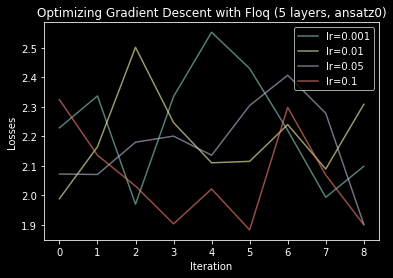

In [54]:
plt.title("Optimizing Gradient Descent with Floq (5 layers, ansatz0)".format(i))
for i in (0.001,0.01,0.05,0.1):
    k = "5 layers, 1000 shots, ansatz: StronglyEntangled, grad_descent with train_rate={}. Every 100th iteration is printed.".format(i)
    print(k)
    print(qcbm_costs[k])
    plt.plot(np.arange(len(qcbm_costs[k])),qcbm_costs[k],  alpha=0.6, label="lr={}".format(i))
    plt.legend()
    plt.ylabel("Losses")
    plt.xlabel("Iteration")
plt.show() 